### Problem Statement 

Our client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

* Historical data of demand for a product-center combination (Weeks: 1 to 145)

* Product(Meal) features such as category, sub-category, current price and discount

* Information for fulfillment center like center area, city information etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("~/Downloads/train.csv")
meals = pd.read_csv("~/Downloads/meal_info.csv")
centre = pd.read_csv("~/Downloads/fulfilment_center_info.csv")
test = pd.read_csv("~/Downloads/test_QoiMO9B.csv")
submission = pd.read_csv("~/Downloads/sample_submission_hSlSoT6.csv")

In [4]:
train.shape, meals.shape, centre.shape, test.shape

((456548, 9), (51, 3), (77, 5), (32573, 8))

In [5]:
# Merge the Data
train.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders'],
      dtype='object')

In [6]:
meals.columns

Index(['meal_id', 'category', 'cuisine'], dtype='object')

In [10]:
# We will combine the Train and Meal ID
#pd.merge(train, meals, on = "meal_id", how = "left").shape

# Combine Train and Test
combined = pd.concat([train, test], ignore_index = True)
combined = pd.merge(combined, meals, on = "meal_id", how = "left")

In [15]:
# Combine Centres using Center_id
combined = pd.merge(combined, centre, on = "center_id", how = "left")

In [16]:
combined.shape

(489121, 15)

In [17]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0


In [24]:
# Difference in Check out and Base price
combined["diff_in_price"] = np.abs(combined["base_price"]\
                                   - combined["checkout_price"])

In [25]:
combined["prop"] = combined.diff_in_price/combined.checkout_price

In [26]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff_in_price,prop
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,0.112987
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007308
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007415
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,0.288748
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0,1.00,0.004107


<AxesSubplot:xlabel='num_orders'>

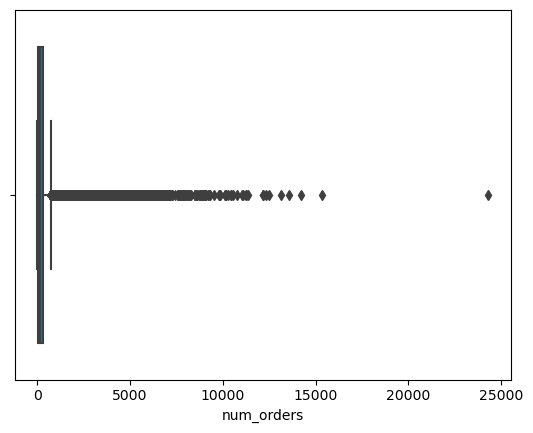

In [27]:
# Plotting the Target variable...
sns.boxplot(combined.num_orders)

In [29]:
# Cat vs Target
combined.select_dtypes(include = "object").columns

Index(['category', 'cuisine', 'center_type'], dtype='object')

In [30]:
combined.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'diff_in_price', 'prop'],
      dtype='object')

In [31]:
cat_cols = ['category', 'cuisine', 'center_type', 
            'center_id', 'meal_id',
           'emailer_for_promotion', 'homepage_featured',
           "city_code", "region_code"]

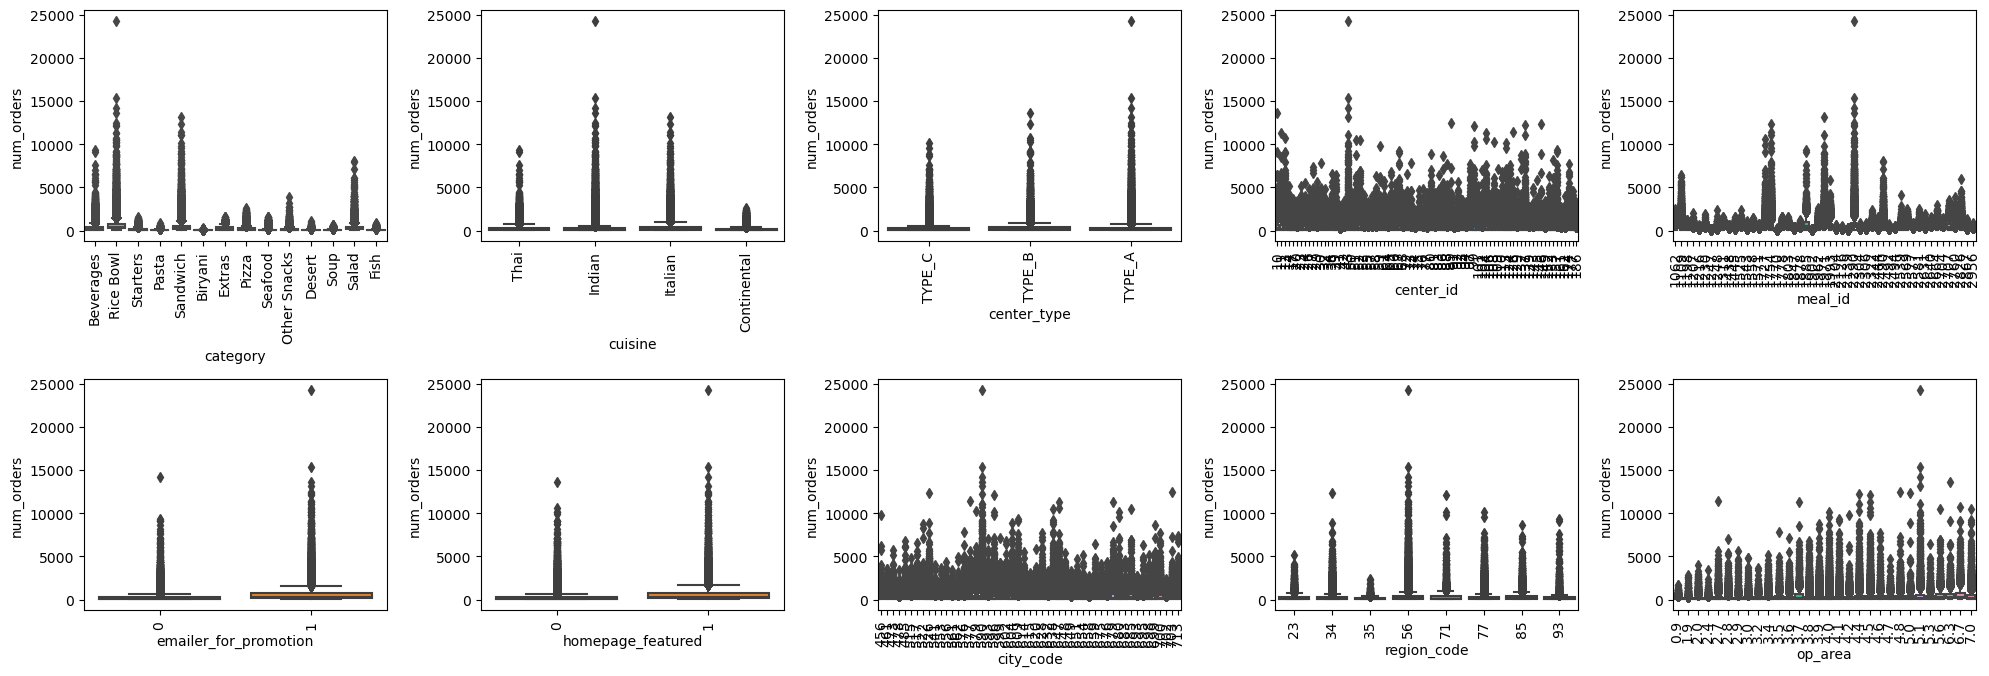

In [34]:
nrows = 3
ncols = 5
repeater = 1

plt.figure(figsize = (20, 10))
for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.boxplot(combined.loc[:, i], combined.num_orders)
    plt.xticks(rotation = 90)
    repeater = repeater+1
    
plt.tight_layout()
plt.show()

# Most People Prefer Ricebowl, Sandwich Salad and Beverages
# Most People prefer Indian Food over the other cuisine
# Food Procurement is happening from Centre Type A
# Most Popular Region Code - 56

In [35]:
# Created a New Variable Called Social media
combined["social_media"] = combined.emailer_for_promotion\
+combined.homepage_featured

<AxesSubplot:xlabel='social_media', ylabel='num_orders'>

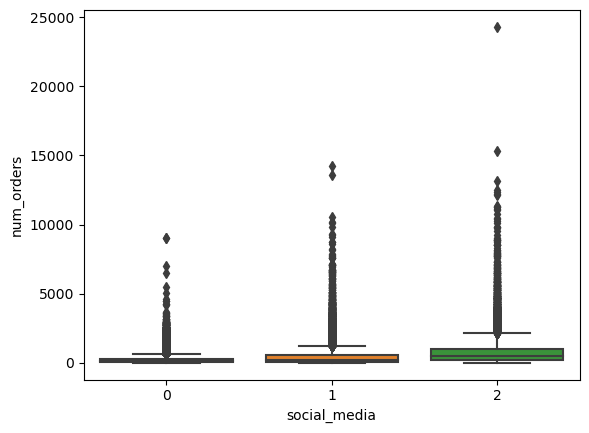

In [36]:
sns.boxplot(combined.social_media, combined.num_orders)

In [39]:
# Combine City Code and Region 

combined["region"] = combined.city_code.astype("str")\
+"_"+combined.region_code.astype("str")

In [54]:
# Count of City Basis region
combined["count_city_region"] = combined.groupby("region_code")\
["city_code"].transform("nunique")

In [56]:
# Count of Orders basis region
combined["count_orders_region"]= combined.groupby("region_code")["meal_id"]\
.transform("nunique")

In [65]:
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,...,region_code,center_type,op_area,diff_in_price,prop,social_media,region,count_city_region,count_orders_region,count_city_centre
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,...,56,TYPE_C,2.0,15.46,0.112987,0,647_56,16,51,13
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,...,56,TYPE_C,2.0,1.00,0.007308,0,647_56,16,51,13
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,...,56,TYPE_C,2.0,1.00,0.007415,0,647_56,16,51,13
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,...,56,TYPE_C,2.0,98.03,0.288748,0,647_56,16,51,13
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,...,56,TYPE_C,2.0,1.00,0.004107,0,647_56,16,51,13


In [64]:
# Count of Cities Basis Centre Type
combined["count_city_centre"] = combined.groupby("center_type")\
["city_code"].transform("nunique")

In [68]:
# Relation between Cuisine and Meal ID
combined.groupby("cuisine")["meal_id"].transform("nunique")

count    489121.000000
mean         12.776237
std           1.313838
min          12.000000
25%          12.000000
50%          12.000000
75%          15.000000
max          15.000000
Name: meal_id, dtype: float64

In [72]:
# City Wise Count of Meals
combined["count_city_orders"] = combined.groupby("city_code")["meal_id"]\
.transform("nunique")

combined["avg_city_orders"] = combined.groupby("city_code")["meal_id"]\
.transform("mean")

combined["median_city_orders"] = combined.groupby("city_code")["meal_id"]\
.transform("median")

combined["std_city_orders"] = combined.groupby("city_code")["meal_id"]\
.transform("std")

In [73]:
# Order Count Region Wise
combined["avg_orders_region"]= combined.groupby("region_code")["meal_id"]\
.transform("mean")

combined["median_orders_region"]= combined.groupby("region_code")["meal_id"]\
.transform("median")

combined["std_orders_region"]= combined.groupby("region_code")["meal_id"]\
.transform("std")

In [76]:
#Category wise Number of Orders
combined["count_order_cat"] = combined.groupby("category")\
["meal_id"].transform("nunique")

combined["avg_order_cat"] = combined.groupby("category")\
["meal_id"].transform("mean")

combined["median_order_cat"] = combined.groupby("category")\
["meal_id"].transform("median")

combined["std_order_cat"] = combined.groupby("category")\
["meal_id"].transform("std")

In [77]:
# Cuisine Wise count of orders...

combined["count_order_cuisine"] = combined.groupby("cuisine")\
["meal_id"].transform("nunique")

combined["avg_order_cuisine"] = combined.groupby("cuisine")\
["meal_id"].transform("mean")

combined["median_order_cuisine"] = combined.groupby("cuisine")\
["meal_id"].transform("median")

combined["std_order_cuisine"] = combined.groupby("cuisine")\
["meal_id"].transform("std")

In [79]:
pd.set_option("display.max_columns", 100)
combined.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area,diff_in_price,prop,social_media,region,count_city_region,count_orders_region,count_city_centre,count_city_orders,avg_city_orders,median_city_orders,std_city_orders,avg_orders_region,median_orders_region,std_orders_region,count_order_cat,avg_order_cat,median_order_cat,std_order_cat,count_order_cuisine,avg_order_cuisine,median_order_cuisine,std_order_cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,Beverages,Thai,647,56,TYPE_C,2.0,15.46,0.112987,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007308,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,Beverages,Thai,647,56,TYPE_C,2.0,1.00,0.007415,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,15,2139.650927,1993.0,493.723836
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,Beverages,Indian,647,56,TYPE_C,2.0,98.03,0.288748,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,Beverages,Indian,647,56,TYPE_C,2.0,1.00,0.004107,0,647_56,16,51,13,50,2005.521434,1971.0,556.977988,2004.850545,1971.0,550.071391,12,1893.081524,1885.0,572.193659,12,1875.408150,1902.0,503.578350


In [80]:
combined.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area,diff_in_price,prop,social_media,count_city_region,count_orders_region,count_city_centre,count_city_orders,avg_city_orders,median_city_orders,std_city_orders,avg_orders_region,median_orders_region,std_orders_region,count_order_cat,avg_order_cat,median_order_cat,std_order_cat,count_order_cuisine,avg_order_cuisine,median_order_cuisine,std_order_cuisine
count,4.891210e+05,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,456548.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.00000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000,489121.000000
mean,1.249988e+06,79.810613,82.092206,2024.852268,332.879277,354.312259,0.080172,0.107346,261.872760,601.551172,56.621065,4.083865,22.374939,0.085013,0.187518,13.334300,47.973003,26.447906,47.50935,2024.852268,1995.963913,547.042626,2024.852268,1982.985509,547.072562,5.516819,2024.852268,2082.408059,460.672643,12.776237,2024.852268,1999.428289,534.906247
std,1.443421e+05,44.343325,45.973390,547.408978,153.022073,160.352168,0.271560,0.309552,395.922798,66.182598,17.641296,1.092163,47.544701,0.241221,0.485684,4.461861,2.935156,11.131783,3.05111,20.262840,45.568256,4.575396,19.070190,17.031699,2.969073,4.039434,261.703152,335.282252,137.674163,1.313838,110.161520,83.542952,37.391300
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.000000,13.000000,456.000000,23.000000,0.900000,0.000000,0.000000,0.000000,1.000000,44.000000,13.000000,42.00000,1993.256608,1962.000000,534.875208,2004.782943,1971.000000,541.729141,3.000000,1445.477463,1311.000000,71.283118,12.000000,1875.408150,1902.000000,493.723836
25%,1.124937e+06,42.000000,43.000000,1558.000000,228.010000,243.500000,0.000000,0.000000,54.000000,553.000000,34.000000,3.600000,1.000000,0.001410,0.000000,12.000000,45.000000,14.000000,45.00000,2004.174048,1971.000000,542.965306,2004.850545,1971.000000,544.841075,3.000000,1893.081524,1885.000000,414.022717,12.000000,1952.357718,1962.000000,493.723836
50%,1.249977e+06,81.000000,76.000000,1993.000000,299.760000,311.430000,0.000000,0.000000,136.000000,596.000000,56.000000,4.000000,1.000000,0.003668,0.000000,16.000000,50.000000,36.000000,48.00000,2029.311788,1971.000000,548.465626,2029.311788,1971.000000,544.908236,3.000000,1919.683944,1962.000000,479.613318,12.000000,2111.899181,1993.000000,503.578350
75%,1.374988e+06,118.000000,110.000000,2539.000000,445.230000,458.810000,0.000000,0.000000,324.000000,651.000000,77.000000,4.500000,14.550000,0.053174,0.000000,16.000000,51.000000,36.000000,51.00000,2044.013875,1993.000000,549.678855,2042.219927,1993.000000,550.071391,12.000000,2210.790130,2444.000000,572.193659,15.000000,2139.650927,2126.000000,564.192829
max,1.499999e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000,24299.000000,713.000000,93.000000,7.000000,820.590000,105.481481,2.000000,16.000000,51.000000,36.000000,51.00000,2067.288782,2126.000000,557.989923,2067.288782,2104.000000,554.788215,12.000000,2576.059771,2704.000000,599.826698,15.000000,2139.650927,2126.000000,581.341009


In [83]:
combined.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category',
       'cuisine', 'city_code', 'region_code', 'center_type', 'op_area',
       'diff_in_price', 'prop', 'social_media', 'region', 'count_city_region',
       'count_orders_region', 'count_city_centre', 'count_city_orders',
       'avg_city_orders', 'median_city_orders', 'std_city_orders',
       'avg_orders_region', 'median_orders_region', 'std_orders_region',
       'count_order_cat', 'avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'avg_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine'],
      dtype='object')

In [84]:
num_cols = ['checkout_price', 'base_price', 'num_orders', 'diff_in_price',
           'count_city_region',
       'count_orders_region', 'count_city_centre', 'count_city_orders',
       'avg_city_orders', 'median_city_orders', 'std_city_orders',
       'avg_orders_region', 'median_orders_region', 'std_orders_region',
       'count_order_cat', 'avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'avg_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine']

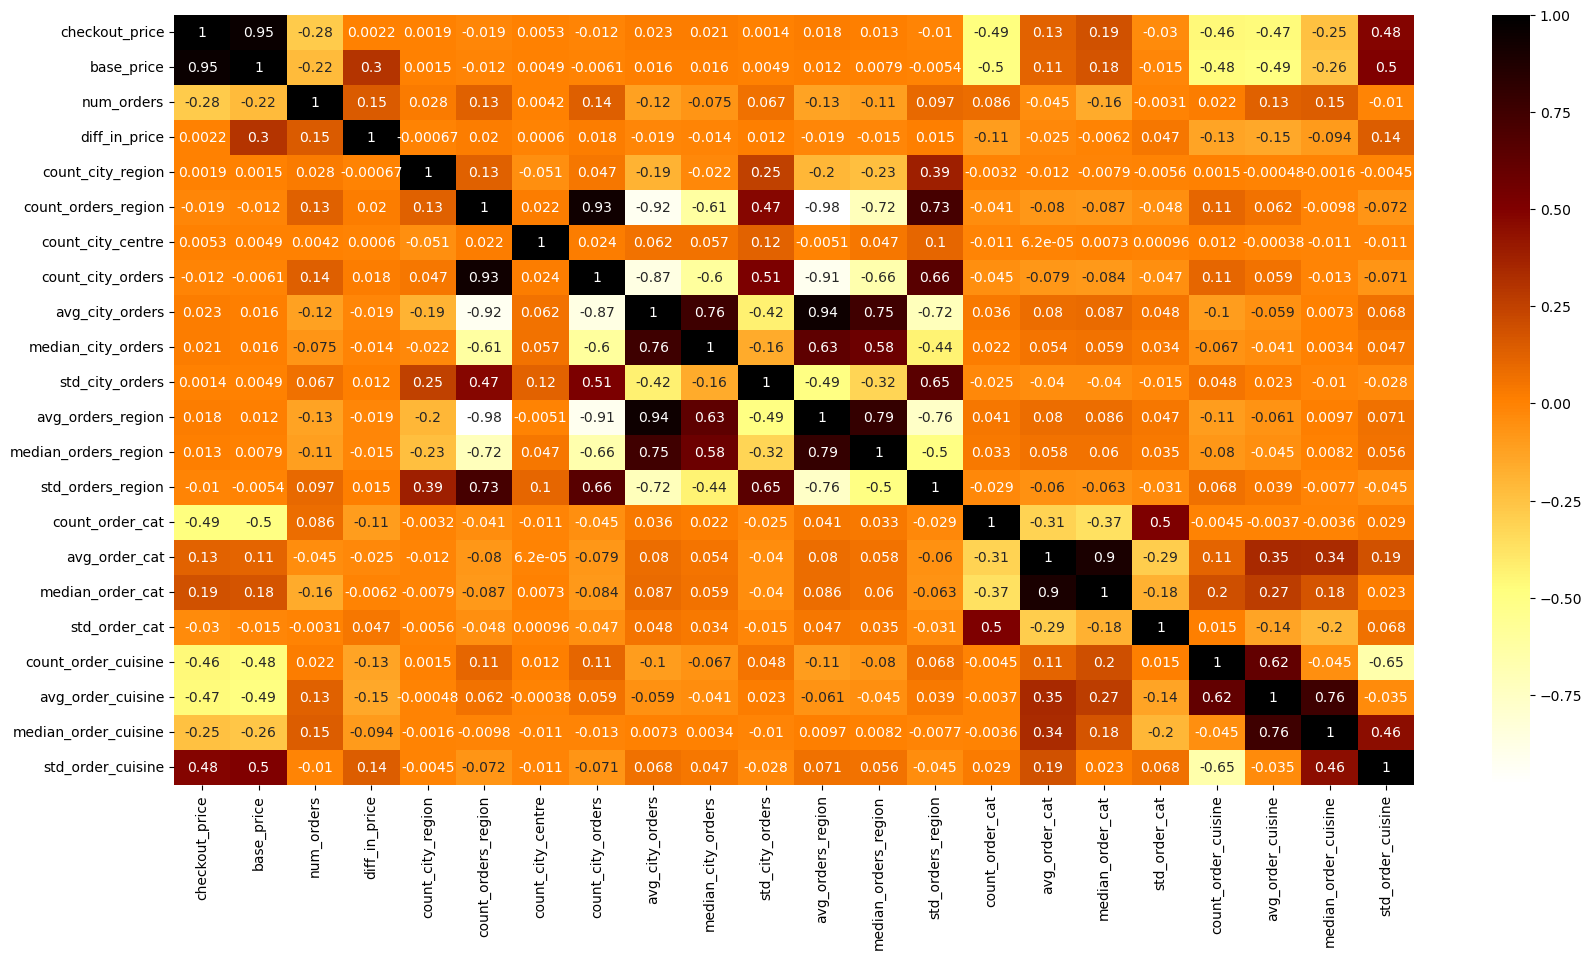

In [87]:
# Lets check the Correlation with Target
plt.figure(figsize = (20, 10))
sns.heatmap(combined.loc[:, num_cols].corr(), annot = True, cmap = "afmhot_r")
plt.show()

In [88]:
# Average Orders Per Week

combined["count_order_week"] = combined.groupby("week")["meal_id"]\
.transform("nunique")

combined["avg_order_week"] = combined.groupby("week")["meal_id"]\
.transform("nunique")

0         45
1         45
2         45
3         45
4         45
          ..
489116    51
489117    51
489118    51
489119    51
489120    51
Name: meal_id, Length: 489121, dtype: int64

In [90]:
combined.week.value_counts()[0:2]

122    3359
105    3348
Name: week, dtype: int64

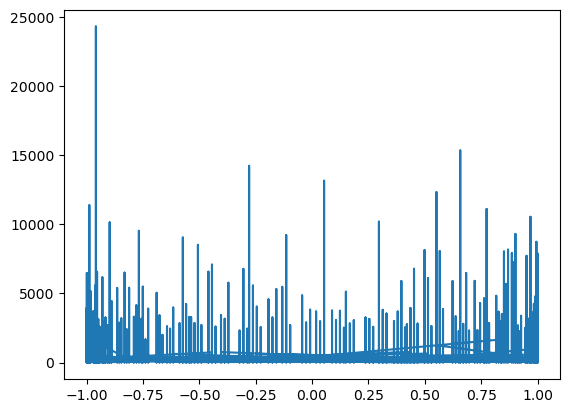

In [93]:
plt.plot(np.sin(combined.week), combined.num_orders)

In [98]:
combined["sine_week"] = np.sin((2*np.pi*combined.week)/52)
combined["cos_week"] = np.cos((2*np.pi*combined.week)/52)

In [102]:
new.columns

Index(['week', 'checkout_price', 'base_price', 'num_orders', 'category',
       'cuisine', 'center_type', 'op_area', 'diff_in_price', 'prop',
       'social_media', 'region', 'count_city_region', 'count_orders_region',
       'count_city_centre', 'count_city_orders', 'avg_city_orders',
       'median_city_orders', 'std_city_orders', 'avg_orders_region',
       'median_orders_region', 'std_orders_region', 'count_order_cat',
       'avg_order_cat', 'median_order_cat', 'std_order_cat',
       'count_order_cuisine', 'avg_order_cuisine', 'median_order_cuisine',
       'std_order_cuisine', 'sine_week', 'cos_week'],
      dtype='object')

In [100]:
# Drop the Unnecessary Variables
new = combined.drop(["id", "center_id", "meal_id", "city_code", 
               "region_code", "emailer_for_promotion", 
              "homepage_featured"], axis = 1)

In [103]:
# Factorize the Cat vars
new["cuisine"] = pd.factorize(new.cuisine)[0]
new["center_type"] = pd.factorize(new.center_type)[0]
new["category"] = pd.factorize(new.category)[0]
new["op_area"] = pd.factorize(new.op_area)[0]
new["region"] = pd.factorize(new.region)[0]

In [104]:
# Split the Data in Train and Test ~ With Outliers
with_outliers_train = new.loc[0:train.shape[0]-1, ]
with_outliers_test = new.loc[train.shape[0]:, ]

X_outliers = with_outliers_train.drop("num_orders", axis = 1)
with_outliers_test = with_outliers_test.drop("num_orders", axis = 1)

y = with_outliers_train.num_orders

In [115]:
# Reset the Index in the Test Set
with_outliers_test = with_outliers_test.reset_index()\
.drop("index", axis = 1)

In [117]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()

cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

pred = []
pred_lgbm = []
for train_index, test_index in cv.split(X_outliers, y):
    xtrain = X_outliers.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(with_outliers_test))
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict(with_outliers_test))

In [119]:
# Submission
submission["num_orders"] =  np.abs(pd.DataFrame(pred_lgbm).T.mean(axis = 1))
submission.to_csv("LGBModel.csv", index = False) 
# XGB: 70.98017412305778 
# LGBM: 75.98017412305778

In [120]:
# Without Outliers/

q1 = np.quantile(with_outliers_train, 0.25)
q3 = np.quantile(with_outliers_train, 0.75)
iqr = q3 - q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

In [121]:
wt_outliers = with_outliers_train.loc[~((with_outliers_train<lower_lim) \
                                        |(with_outliers_train>upper_lim))\
                                      .any(axis = 1)]

In [127]:
X_outliers = wt_outliers.drop("num_orders", axis = 1)
y = wt_outliers.num_orders

In [128]:
xgb = XGBRegressor()
lgbm = LGBMRegressor()

cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

pred = []
pred_lgbm = []
for train_index, test_index in cv.split(X_outliers, y):
    xtrain = X_outliers.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(with_outliers_test))
    pred_lgbm.append(lgbm.fit(xtrain, ytrain).predict(with_outliers_test))

In [130]:
# Submission
submission["num_orders"] =  np.abs(pd.DataFrame(pred_lgbm).T.mean(axis = 1))
submission.to_csv("LGB_OutlierModel.csv", index = False) 
# XGB: 71 
# LGBM: 73

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

cv = KFold(n_splits = 5, random_state = 42, shuffle = True)

pred = []
for train_index, test_index in cv.split(X_outliers, y):
    xtrain = X_outliers.iloc[train_index]
    ytrain = y.iloc[train_index]
    pred.append(rf.fit(xtrain, ytrain).predict(with_outliers_test))

In [ ]:
# Submission
submission["num_orders"] =  np.abs(pd.DataFrame(pred).T.mean(axis = 1))
submission.to_csv("RandomForest.csv", index = False) 
# XGB: 71 
# LGBM: 73